# Подготовительный этап

In [ ]:
!mkdir imgs

mkdir: cannot create directory ‘imgs’: File exists


In [ ]:
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import cv2
from google.colab.patches import cv2_imshow
from tqdm.notebook import tqdm
from ipywidgets import interact
from sklearn import datasets

%matplotlib inline
plt.style.use('ggplot')

Импортируем датасет MNIST (только тестовую его часть из 10 тыс. изображений)

In [ ]:
(_, _), (X, y) = mnist.load_data()

In [ ]:
X.shape

(10000, 28, 28)

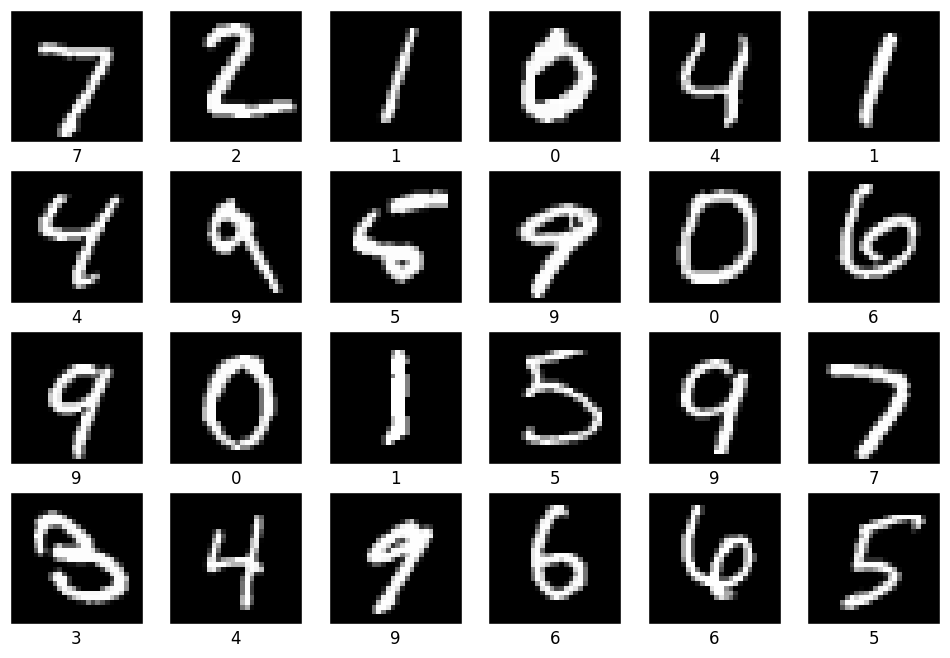

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i], color='black')

In [ ]:
X = X.reshape(len(X), -1)
X.shape

(10000, 784)

# t-SNE (Sklearn)

Рассмотрим [библиотечную реализацию t-SNE](https://scikit-learn.org/dev/modules/generated/sklearn.manifold.TSNE.html) на небольшом наборе синтетических данных.

In [ ]:
link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


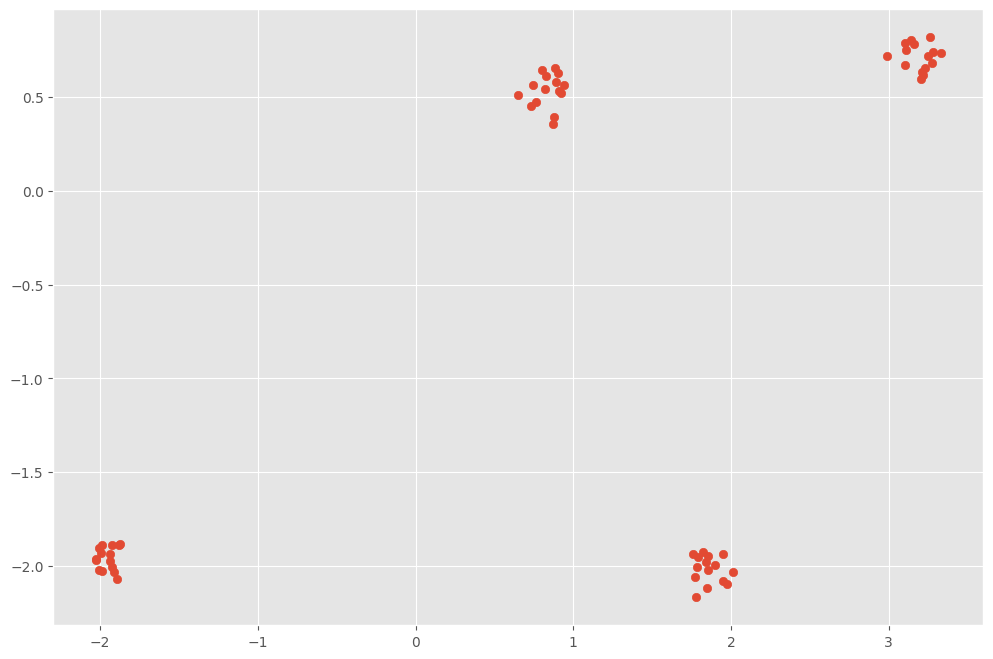

In [ ]:
t_SNE_lib = TSNE(n_components=2, init='random', perplexity=30)
data_tSNE_lib = t_SNE_lib.fit_transform(data)
plt.scatter(x=data_tSNE_lib[:, 0], y=data_tSNE_lib[:,1])
plt.show()

# t-SNE на MNIST

In [ ]:
n_samples = 10000

X_sampled = X[:n_samples]
t_SNE_lib = TSNE(n_components=2, init='random', perplexity=30)
X_tSNE_lib = t_SNE_lib.fit_transform(X_sampled)
X_tSNE_lib[:3]

array([[58.62995  , 22.192936 ],
       [-9.110676 , 55.024197 ],
       [12.4326725, 62.886917 ]], dtype=float32)

Визуализируем результат

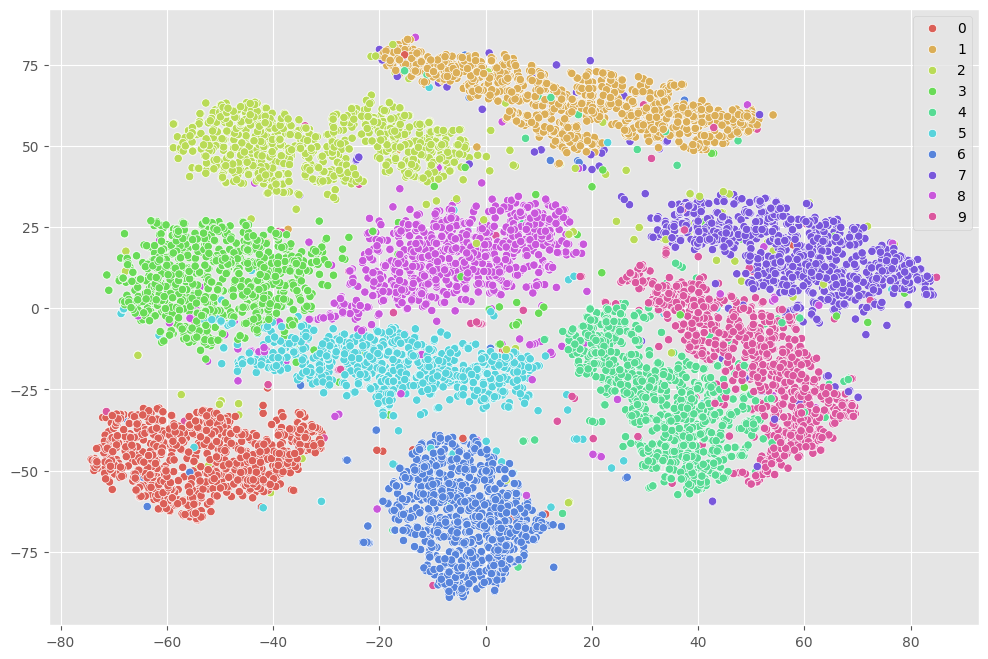

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
sns.scatterplot(x=X_tSNE_lib[:,0], y=X_tSNE_lib[:,1], hue=y, palette=sns.color_palette("hls", 10))
plt.show()

In [ ]:
n_samples = 1000
X_sampled = X[:n_samples]

images = []
for perp in tqdm(range(10, 110, 10)):
    t_SNE_lib = TSNE(n_components=2, init='random', perplexity=perp, random_state=42)
    X_tSNE_lib = t_SNE_lib.fit_transform(X_sampled)
    images.append(X_tSNE_lib)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
for idx, img in enumerate(images):
    plt.rcParams["figure.figsize"] = (12, 8)
    sns.scatterplot(x=img[:,0], y=img[:,1], hue=y[:n_samples], palette=sns.color_palette("hls", 10))
    plt.axis('off')
    plt.savefig('imgs/step_'+str(idx)+'.png')
    plt.close()

In [ ]:
digits = []
for idx, img in enumerate(images):
    digits.append(cv2.imread('imgs/step_'+str(idx)+'.png'))

In [ ]:
def browse_images(digits):
    n = len(digits)
    def view_image(i):
        plt.imshow(digits[i])
        plt.title('Perplexity: ' + str((i+1)*10))
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0, n-1))

In [ ]:
browse_images(digits)

interactive(children=(IntSlider(value=4, description='i', max=9), Output()), _dom_classes=('widget-interact',)…